In [22]:
from pgmpy.estimators import PC
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd 
import numpy as np 

In [23]:
df = pd.read_csv('salaries.csv')
filtered_df = df[
    (df['work_year'].isin([2023, 2024])) & 
    (df['experience_level'].isin(['MI', 'SE'])) & 
    (df['employment_type'] == 'FT') & 
    (df['company_size'].isin(['L', 'M'])) & 
    (df['job_title'].isin(['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer'])) & 
    (df['company_location'] == 'US') & 
    (df['employee_residence'] == 'US')
]
df = filtered_df
print (df.head(5))

    work_year experience_level employment_type                  job_title  \
12       2024               MI              FT               Data Analyst   
13       2024               MI              FT               Data Analyst   
22       2024               SE              FT  Machine Learning Engineer   
23       2024               SE              FT  Machine Learning Engineer   
24       2024               MI              FT             Data Scientist   

    salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
12  112300             USD         112300                 US             0   
13   75100             USD          75100                 US             0   
22  190000             USD         190000                 US             0   
23  100000             USD         100000                 US             0   
24  150650             USD         150650                 US             0   

   company_location company_size  
12               US            M 

In [24]:
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = ['work_year', 'experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']


ordinal_encoder = OrdinalEncoder()
df[categorical_columns] = ordinal_encoder.fit_transform(df[categorical_columns])
encoded_values = ordinal_encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_values, columns=categorical_columns)
print(encoded_df)

      work_year  experience_level  employment_type  job_title  \
0           1.0               0.0              0.0        0.0   
1           1.0               0.0              0.0        0.0   
2           1.0               1.0              0.0        3.0   
3           1.0               1.0              0.0        3.0   
4           1.0               0.0              0.0        2.0   
...         ...               ...              ...        ...   
7640        0.0               0.0              0.0        0.0   
7641        0.0               1.0              0.0        3.0   
7642        0.0               1.0              0.0        3.0   
7643        0.0               0.0              0.0        2.0   
7644        0.0               0.0              0.0        2.0   

      employee_residence  company_location  company_size  
0                    0.0               0.0           1.0  
1                    0.0               0.0           1.0  
2                    0.0               0.0

# We apply the PC algorithm to identify potential causal relationships in our data, resulting in a Directed Acyclic Graph (DAG).

  0%|          | 0/6 [00:00<?, ?it/s]

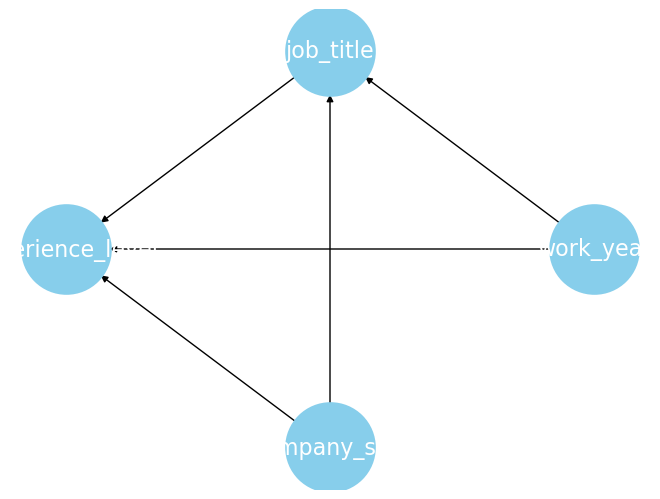

In [25]:
data = encoded_df.copy()
pc = PC(data)
learned_graph = pc.estimate(return_type='dag', significance_level=0.05, max_cond_vars=len(data.columns)-1)
nx.draw_circular(
    learned_graph,
    with_labels=True,
    node_size=4000,
    font_size=16,  
    font_color='white',
    node_color='skyblue', 
    linewidths=2,  
    edge_color='k'  
)
plt.show()


we devide the basis of the model on three methods, i do a pc and read everything about it and what it assumues and how it works and fully implelemnt it' limitations advatnages and what does the output sayss. pick a method come up with the graogh and what does it mean, weights? what are the weights.